In [1]:
%load_ext autoreload
%autoreload

In [2]:
from utils_v1 import *


In [3]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import sys
import numpy as np
from src.dataset import (
    MultipleDates,
    PAMultipleDates,
    MTMultipleDates,
    MAMultipleDates,
    MSMultipleDates,
    PIMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
from src.manager.multioutput import ManagerMCDropout, ManagerSingleRun, ManagerEnsemble, ManagerEvidential2
from src.Logger import Logger


Tensorflow ver. 2.6.0


In [4]:
ic.configureOutput(includeContext=True)

In [5]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [6]:
config = {
	"training": True,
	"inferring": True,
	"site": "PA", # values: MT, PA, MS, PI
	"training_date": "earlier", # values: earlier, current
	"mode": "ensemble", # values: mcd, single_run, ensemble, evidential2
	"uncertainty_method": "pred_entropy", # pred_var MI pred_entropy KL pred_entropy_single
	"loadInference": False,
	"removePolygons": True,
	"plotLandsat": False,
	"plotPOI": False,

	"save_probabilities": False,
	"addPastDeforestationInput": True,
	"classes_mode": False,
	"learning_rate": 1e-4,
    "use_cloud_mask": True,
}

In [7]:



if config['mode'] == 'mcd':
	managerClass = ManagerMCDropout
	config['inference_times'] = 10
	config['training_times'] = 1
elif config['mode'] == 'single_run':
	managerClass = ManagerSingleRun
	config['inference_times'] = 1
	config['training_times'] = 1
	config['uncertainty_method'] = 'pred_entropy_single'
elif config['mode'] == 'ensemble':
	managerClass = ManagerEnsemble
	config['inference_times'] = 10
	config['training_times'] = 10
elif config['mode'] == 'evidential2':
	managerClass = ManagerEvidential2
	config['inference_times'] = 1
	config['training_times'] = 1
else:
	raise ValueError('Invalid mode')

print(config)

if config['site'] == 'PA':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2017, 2018]
	else:
		dates = [2018, 2019]
	datasetClass = PAMultipleDates
elif config['site'] == 'MT':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = MTMultipleDates
elif config['site'] == 'MS':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = MSMultipleDates
elif config['site'] == 'PI':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = PIMultipleDates
else:
	raise ValueError('Invalid site')

dataset = datasetClass(config = config,
			   dates = dates, 
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()



if config['training'] == False:

	if type(dataset) == PAMultipleDates:


		if config['training_date'] == 'current': exp = 0; repetition_id = 0
		elif config['training_date'] == 'earlier': 
			exp = 1; repetition_id = 7
			exp = 20; repetition_id = 0
		 
	elif type(dataset) == MTMultipleDates:
		
		if config['training_date'] == 'current': exp = 2; repetition_id = 8
		elif config['training_date'] == 'earlier': exp = 3; repetition_id = 6		

	elif type(dataset) == MSMultipleDates:

		if config['training_date'] == 'current': exp = 4; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 5; repetition_id = 0		

	elif type(dataset) == PIMultipleDates:

		if config['training_date'] == 'current': exp = 6; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 7; repetition_id = 0		

else:

	exp = 9
	repetition_id = 0
	
logger = Logger()
manager = managerClass(config, dataset, patchesHandler, logger)
manager.defineExperiment(exp)


{'training': True, 'inferring': True, 'site': 'PA', 'training_date': 'current', 'mode': 'ensemble', 'uncertainty_method': 'pred_entropy', 'loadInference': False, 'removePolygons': True, 'plotLandsat': False, 'plotPOI': False, 'save_probabilities': False, 'addPastDeforestationInput': True, 'classes_mode': True, 'learning_rate': 0.0001, 'use_cloud_mask': True, 'inference_times': 10, 'training_times': 10}


ic| dataset.py:392 in __init__()- list(self.date_ids): [0]
ic| dataset.py:413 in __init__()
    self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| patchesHandler.py:166 in __init__()- self.input_image_shape: 21
ic| patchesHandler.py:167 in __init__()
    self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [8]:
dates

[2018, 2019]

In [9]:
manager.config

{'training': True,
 'inferring': True,
 'site': 'PA',
 'training_date': 'current',
 'mode': 'ensemble',
 'uncertainty_method': 'pred_entropy',
 'loadInference': False,
 'removePolygons': True,
 'plotLandsat': False,
 'plotPOI': False,
 'save_probabilities': False,
 'addPastDeforestationInput': True,
 'classes_mode': True,
 'learning_rate': 0.0001,
 'use_cloud_mask': True,
 'inference_times': 10,
 'training_times': 10,
 'dropout_training': False}

In [10]:
exp

20

In [11]:
manager.setExperimentPath()
manager.createLogFolders()

In [12]:
# ic(type(dataset), exp, dataset.dates)


In [13]:

manager.loadLabel()

D:/Jorge/datasets/deforestation/PA/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:501 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| dataset.py:504 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:508 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/PA/deforestation_before_2008_PA.tif


ic| dataset.py:512 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| dataset.py:514 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| dataset.py:493 in loadLabel()
    label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


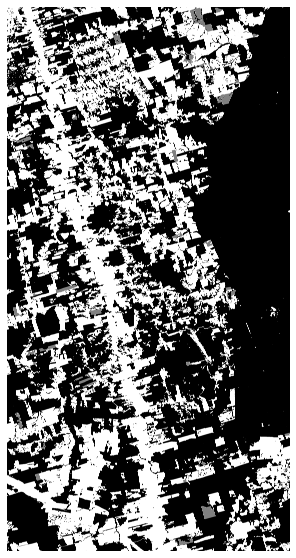

In [14]:
manager.logger.plotFigure(manager.label_mask, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [15]:

# Creating tile mask
manager.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [16]:
def get_pixel_count_set(label, mask, set_id):
    label_set = label[mask == set_id]
    return np.unique(label_set, return_counts=True)


In [17]:

np.unique(manager.mask_tiles)
for set_id in np.unique(manager.mask_tiles):
    print('Set', set_id, get_pixel_count_set(manager.label_mask, manager.mask_tiles, set_id))


Set 1 (array([0, 1, 2], dtype=uint8), array([3848933,   24058, 4282809], dtype=int64))
Set 2 (array([0, 1, 2], dtype=uint8), array([3946794,  155444, 4053562], dtype=int64))
Set 3 (array([0, 1, 2], dtype=uint8), array([3763825,  334071, 4057904], dtype=int64))
Set 4 (array([0, 1, 2], dtype=uint8), array([6200673,  140180, 1814947], dtype=int64))
Set 5 (array([0, 1, 2], dtype=uint8), array([3907717,   93438, 4154645], dtype=int64))
Set 6 (array([0, 1, 2], dtype=uint8), array([4353232,   51100, 3751468], dtype=int64))
Set 7 (array([0, 1, 2], dtype=uint8), array([4994674,   64045, 3097081], dtype=int64))
Set 8 (array([0, 2], dtype=uint8), array([8144807,   10993], dtype=int64))
Set 9 (array([0, 1, 2], dtype=uint8), array([5157160,  137968, 2860672], dtype=int64))
Set 10 (array([0, 1, 2], dtype=uint8), array([3475674,   83519, 4596607], dtype=int64))
Set 11 (array([0, 1, 2], dtype=uint8), array([4649101,  107494, 3399205], dtype=int64))
Set 12 (array([0, 1, 2], dtype=uint8), array([7750220

In [18]:

manager.label_mask.dtype

dtype('uint8')

In [19]:

manager.getLabelCurrentDeforestation()

In [20]:

manager.loadInputImage()

ic| dataset.py:441 in loadInputImage()
    image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [21]:

np.unique(manager.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

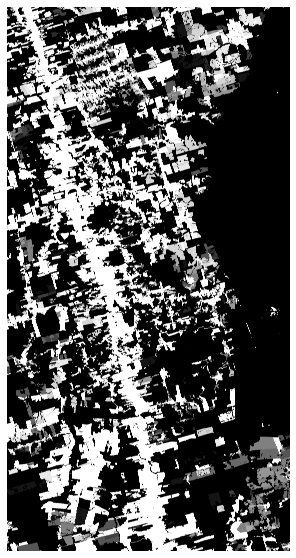

In [22]:

manager.logger.plotFigure(manager.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

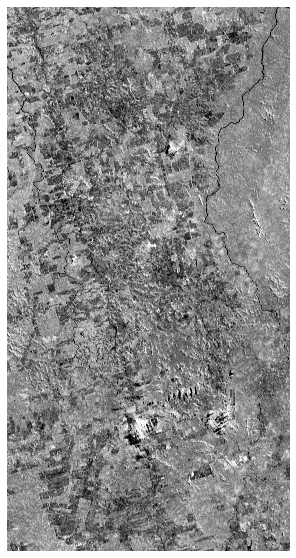

In [23]:

manager.logger.plotFigure(manager.image_stack[...,8], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [24]:
np.unique(manager.label_mask, return_counts=True)

(array([0, 1, 2], dtype=uint8),
 array([100903598,   1838508,  60373894], dtype=int64))

In [25]:
# manager.maskNoDataAsNotConsideredClass()

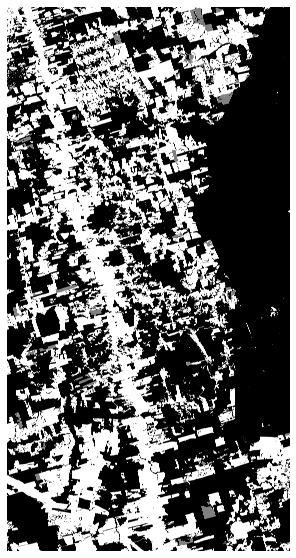

In [26]:

manager.logger.plotFigure(manager.label_mask, 
    name='label_mask', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [27]:

manager.getImageChannels()

ic| base.py:111 in getImageChannels()
    self.image_stack.shape: (17730, 9200, 21)
ic| base.py:113 in getImageChannels()- self.channels: 21


In [28]:

manager.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


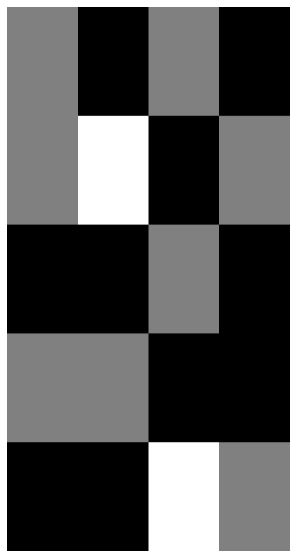

In [29]:
manager.logger.plotFigure(manager.mask_tr_val, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))


In [30]:

train_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 1)
val_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 2)
test_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 0)

total_unique = np.unique(manager.label_mask, return_counts=True)

In [31]:
print("train unique", train_unique)
print("val unique", val_unique)
print("test unique", test_unique)

print("total unique", total_unique)


train unique (array([0, 1, 2], dtype=uint8), array([38253046,   801988, 26191366], dtype=int64))
val unique (array([0, 1, 2], dtype=uint8), array([9179787,  270914, 6860899], dtype=int64))
test unique (array([0, 1, 2], dtype=uint8), array([53470765,   765606, 27321629], dtype=int64))
total unique (array([0, 1, 2], dtype=uint8), array([100903598,   1838508,  60373894], dtype=int64))


In [32]:
print("train unique percentage", np.round(train_unique[1]/np.sum(train_unique[1]), 4))
print("val unique", np.round(val_unique[1]/np.sum(val_unique[1]), 4))
print("test unique", np.round(test_unique[1]/np.sum(test_unique[1]), 4))

train unique percentage [0.5863 0.0123 0.4014]
val unique [0.5628 0.0166 0.4206]
test unique [0.6556 0.0094 0.335 ]


In [33]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    manager.createIdxImage()


ic| patchesHandler.py:25 in create_idx_image()
    im_idx_row.shape: (17730, 9200, 1)
    im_idx_col.shape: (17730, 9200, 1)
ic| patchesHandler.py:26 in create_idx_image()
    im_idx_row.dtype: dtype('uint16')
    im_idx_col.dtype: dtype('uint16')
ic| patchesHandler.py:32 in create_idx_image()
    im_idx.shape: (17730, 9200, 2)
    im_idx.dtype: dtype('uint16')


In [34]:
if config["training"] == True:
    manager.extractCoords()

ic| patchesHandler.py:44 in extract_patches()
    coords.shape: (464, 239, 1, 128, 128, 2)
    coords.dtype: dtype('uint16')
ic| patchesHandler.py:48 in extract_patches()
    coords.shape: (110896, 2)
    coords.dtype: dtype('uint16')


In [35]:
if config["training"] == True:
    manager.trainTestSplit()

ic| base.py:129 in trainTestSplit()
    self.coords_train.shape: (41812, 3)
    self.coords_val.shape: (10260, 3)


In [36]:
if config["training"] == True:
    manager.label_mask.shape

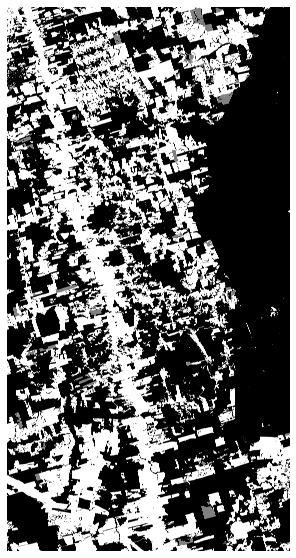

In [37]:
if config["training"] == True:

    manager.logger.plotFigure(manager.label_mask[...,-1], 
        name='Reference', cmap=plt.cm.gray, savefig=False)



In [38]:
if config["training"] == True:
    np.unique(manager.label_mask)

In [39]:
if config["training"] == True:
    print(manager.coords_train)

[[    0     0     0]
 [    0    38     0]
 [    0    76     0]
 ...
 [17594  8968     0]
 [17594  9006     0]
 [17594  9044     0]]


In [40]:
if config["training"] == True:
    manager.retrieveSamplesOfInterest()

training samples:  (3753, 3) validation samples:  (1032, 3)


In [41]:
if config["training"] == True:
    inputSnipShow = True

In [42]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [43]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [44]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [45]:
manager.dataset.image_channels

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]

In [46]:
manager.dataset.bands

10

ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[..

[2280 4750    0]
coord [2280 4750    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


.,dataset.previewBandsSnip[0]]): 0.29747355
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.3196338
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


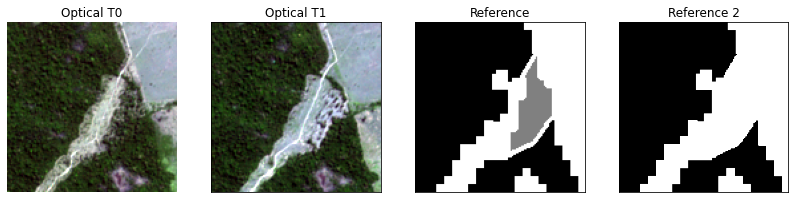

In [47]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 1000)


ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.2714837
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.30292988
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 114 5928    0]
coord [ 114 5928    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


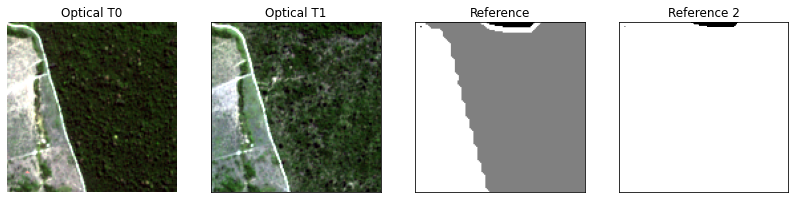

In [48]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 97)


ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.44512972
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.45241854


[ 874 1026    0]
coord [ 874 1026    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


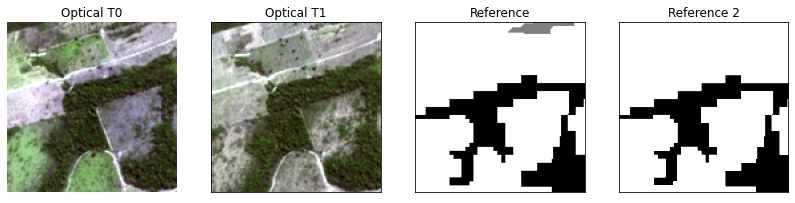

In [49]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 500)

ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.09604081
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.23388559

[ 608 6574    0]
coord [ 608 6574    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


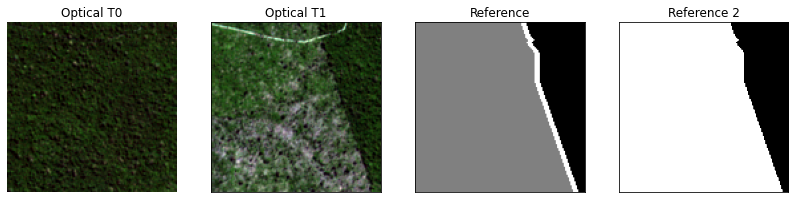

In [50]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.09604081
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 

[ 608 6574    0]
coord [ 608 6574    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


0.23388559


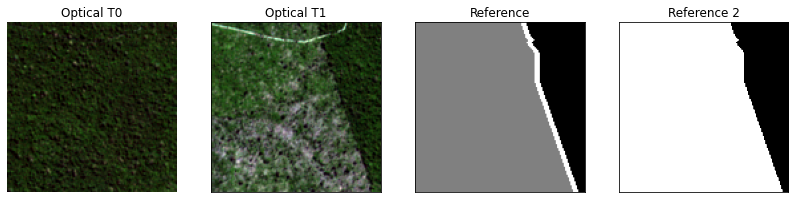

In [51]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

In [52]:
if config["training"] == True:
    manager.getGenerators()


In [53]:
if config["training"] == True:
    manager.fixChannelNumber()

In [54]:
if config["training"] == True:
    print(manager.path_exp)

D:/Jorge/datasets/deforestation/experiments/PA/exp20


In [55]:
if config["training"] == True:
    print(manager.channels)

21


In [56]:
if config["training"] == True:
    print(manager.image_stack.shape)

(17730, 9200, 21)


In [57]:
if config["training"] == True:
    print("config['training_times']", config["training_times"])

config['training_times'] 10


In [58]:
manager.class_n

2

In [59]:
if config["training"] == True:
    for tm in range(config['training_times']):
        manager.repetition_id = tm
        manager.train()

time:  0


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_enc_net (InputLayer)      [(None, 128, 128, 21 0                                            
__________________________________________________________________________________________________
res1_net1 (Conv2D)              (None, 128, 128, 16) 3040        input_enc_net[0][0]              
__________________________________________________________________________________________________
drop_net1 (SpatialDropout2D)    (None, 128, 128, 16) 0           res1_net1[0][0]                  
__________________________________________________________________________________________________
res2_net1 (Conv2D)              (None, 128, 128, 16) 2320        drop_net1[0][0]                  
______________________________________________________________________________________________

c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\training.py:1969: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


K.int_shape(y_pred) (None, 128, 128, 2)
K.int_shape(y_true) (None, None, None, None)
K.int_shape(loss) (None, 128, 128, 2)
K.int_shape(weights) (2,)
K.int_shape(loss) (None, 128, 128, 2)
K.int_shape(loss) (None, 128, 128)
K.int_shape(loss) (None, 128, 128)
K.int_shape(y_pred) (None, 128, 128, 2)
K.int_shape(y_true) (None, None, None, None)
K.int_shape(loss) (None, 128, 128, 2)
K.int_shape(weights) (2,)
K.int_shape(loss) (None, 128, 128, 2)
K.int_shape(loss) (None, 128, 128)
K.int_shape(loss) (None, 128, 128)
351/351 [==============================] - ETA: 0s - loss: 0.1042 - accuracy: 0.5134K.int_shape(y_pred) (None, 128, 128, 2)
K.int_shape(y_true) (None, None, None, None)
K.int_shape(loss) (None, 128, 128, 2)
K.int_shape(weights) (2,)
K.int_shape(loss) (None, 128, 128, 2)
K.int_shape(loss) (None, 128, 128)
K.int_shape(loss) (None, 128, 128)
351/351 [==============================] - 38s 94ms/step - loss: 0.1042 - accuracy: 0.5134 - val_loss: 0.0709 - val_accuracy: 0.6450

Epoch 00001

c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/100
351/351 [==============================] - 32s 91ms/step - loss: 0.0590 - accuracy: 0.5536 - val_loss: 0.0543 - val_accuracy: 0.6508

Epoch 00002: val_loss improved from 0.07086 to 0.05426, saving model to D:/Jorge/datasets/deforestation/experiments/PA/exp20/models\resunet_0.h5
Epoch 3/100
351/351 [==============================] - 32s 92ms/step - loss: 0.0522 - accuracy: 0.5567 - val_loss: 0.0544 - val_accuracy: 0.6534

Epoch 00003: val_loss did not improve from 0.05426
Epoch 4/100
351/351 [==============================] - 32s 91ms/step - loss: 0.0484 - accuracy: 0.5617 - val_loss: 0.0549 - val_accuracy: 0.6464

Epoch 00004: val_loss did not improve from 0.05426
Epoch 5/100
351/351 [==============================] - 32s 92ms/step - loss: 0.0461 - accuracy: 0.5634 - val_loss: 0.0565 - val_accuracy: 0.6464

Epoch 00005: val_loss did not improve from 0.05426
Epoch 6/100
351/351 [==============================] - 32s 92ms/step - loss: 0.0438 - accuracy: 0.5644 - val_loss: 0.0

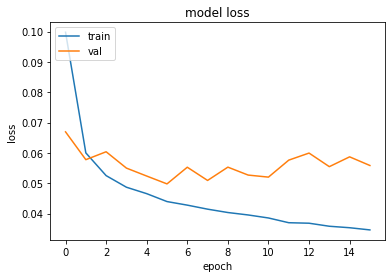

In [60]:
if config["training"] == True:
    manager.plotHistory()


In [61]:
repetition_id = 0

In [62]:
if config["inferring"] != True:
    sys.exit()
else:
    manager.repetition_id = repetition_id

In [63]:
manager.image_stack.shape

(17730, 9200, 21)

In [64]:
manager.patchesHandler.dataset.image_channels[-1]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [65]:
if issubclass(type(dataset), MultipleDates):
	manager.channels = manager.patchesHandler.input_image_shape
	manager.image_stack = manager.image_stack[..., manager.patchesHandler.dataset.image_channels[-1]]
	manager.label_mask = manager.label_mask[...,-1]


In [66]:
manager.image_stack.shape

(17730, 9200, 21)

In [67]:
manager.setPadding()

-30.0 -16.0


In [68]:
import src.network as network
from tensorflow.keras.models import Model, load_model, Sequential
'''
def infer(self):

    self.h, self.w, self.c = self.image1_pad.shape
    self.c = self.channels
    patch_size_rows = self.h//self.n_rows
    patch_size_cols = self.w//self.n_cols
    num_patches_x = int(self.h/patch_size_rows)
    num_patches_y = int(self.w/patch_size_cols)

    ic(self.path_models+ '/' + self.method +'_'+str(self.repetition_id)+'.h5')
    model = load_model(self.path_models+ '/' + self.method +'_'+str(self.repetition_id)+'.h5', compile=False)
    
    if self.classes_mode == False:
        class_n = 3
        self.patchesHandler.class_n = class_n
    else:
        class_n = 2    
        self.patchesHandler.class_n = class_n + 1
    if self.config["loadInference"] == False:
        if self.config["save_probabilities"] == False:
            if self.classes_mode == False:
                self.prob_rec = np.zeros((self.image1_pad.shape[0],self.image1_pad.shape[1], self.config["inference_times"]), dtype = np.float32)
            else:
                self.prob_rec = np.zeros((self.image1_pad.shape[0],self.image1_pad.shape[1], class_n, self.config["inference_times"]), dtype = np.float32)

            # self.prob_rec = np.zeros((image1_pad.shape[0],image1_pad.shape[1], class_n, self.config["inference_times"]), dtype = np.float32)
        print("Dropout training mode: {}".format(self.config['dropout_training']))
        new_model = network.build_resunet_dropout_spatial(input_shape=(patch_size_rows,patch_size_cols, self.c), 
            nb_filters = self.nb_filters, n_classes = class_n, dropout_seed = None, training=self.config['dropout_training'])

        for l in range(1, len(model.layers)):
            new_model.layers[l].set_weights(model.layers[l].get_weights())
        
        

        metrics_all =[]
        with tf.device('/cpu:0'):
            for tm in range(0,self.config["inference_times"]):

                print('time: ', tm)

                
                # Recinstructing predicted map
                start_test = time.time()
                
                prob_reconstructed = self.patchesHandler.infer(
                        new_model, self.image1_pad, self.h, self.w, 
                        num_patches_x, num_patches_y, patch_size_rows, 
                        patch_size_cols, classes_mode = self.classes_mode)
                        
                ts_time =  time.time() - start_test

                if self.config["save_probabilities"] == True:
                    np.save(self.path_maps+'/'+'prob_'+str(tm)+'.npy',prob_reconstructed) 
                else:
                    self.prob_rec[...,tm] = prob_reconstructed
                
                metrics_all.append(ts_time)
                del prob_reconstructed
            metrics_ = np.asarray(metrics_all)
            # Saving test time
            np.save(self.path_exp+'/metrics_ts.npy', metrics_)
    del self.image1_pad
'''

'\ndef infer(self):\n\n    self.h, self.w, self.c = self.image1_pad.shape\n    self.c = self.channels\n    patch_size_rows = self.h//self.n_rows\n    patch_size_cols = self.w//self.n_cols\n    num_patches_x = int(self.h/patch_size_rows)\n    num_patches_y = int(self.w/patch_size_cols)\n\n    ic(self.path_models+ \'/\' + self.method +\'_\'+str(self.repetition_id)+\'.h5\')\n    model = load_model(self.path_models+ \'/\' + self.method +\'_\'+str(self.repetition_id)+\'.h5\', compile=False)\n    \n    if self.classes_mode == False:\n        class_n = 3\n        self.patchesHandler.class_n = class_n\n    else:\n        class_n = 2    \n        self.patchesHandler.class_n = class_n + 1\n    if self.config["loadInference"] == False:\n        if self.config["save_probabilities"] == False:\n            if self.classes_mode == False:\n                self.prob_rec = np.zeros((self.image1_pad.shape[0],self.image1_pad.shape[1], self.config["inference_times"]), dtype = np.float32)\n            else:

In [69]:
'''
import types

manager.infer = types.MethodType(infer, manager)
'''


'\nimport types\n\nmanager.infer = types.MethodType(infer, manager)\n'

In [70]:
manager.infer()

time:  0
Loading model in: D:/Jorge/datasets/deforestation/experiments/PA/exp20/models/resunet_0.h5
time:  1
Loading model in: D:/Jorge/datasets/deforestation/experiments/PA/exp20/models/resunet_1.h5
time:  2
Loading model in: D:/Jorge/datasets/deforestation/experiments/PA/exp20/models/resunet_2.h5
time:  3
Loading model in: D:/Jorge/datasets/deforestation/experiments/PA/exp20/models/resunet_3.h5
time:  4
Loading model in: D:/Jorge/datasets/deforestation/experiments/PA/exp20/models/resunet_4.h5
time:  5
Loading model in: D:/Jorge/datasets/deforestation/experiments/PA/exp20/models/resunet_5.h5
time:  6
Loading model in: D:/Jorge/datasets/deforestation/experiments/PA/exp20/models/resunet_6.h5
time:  7
Loading model in: D:/Jorge/datasets/deforestation/experiments/PA/exp20/models/resunet_7.h5
time:  8
Loading model in: D:/Jorge/datasets/deforestation/experiments/PA/exp20/models/resunet_8.h5
time:  9
Loading model in: D:/Jorge/datasets/deforestation/experiments/PA/exp20/models/resunet_9.h5


In [71]:
manager.loadPredictedProbabilities()

In [72]:
manager.prob_rec.shape

(17760, 9216, 2, 10)

In [73]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [74]:
manager.prob_rec.shape

(17760, 9216, 2, 10)

In [75]:
manager.getMeanProb()

In [76]:
manager.logger.getStats(manager.mean_prob)

ic| Logger.py:119 in getStats()
    np.min(value): 2.1846316e-09
    np.mean(value): 0.025759313
    np.max(value): 0.9999304


In [77]:
ic(manager.mean_prob.shape)

ic| 3703776524.py:1 in <cell line: 1>()
    manager.mean_prob.shape: (17760

, 9216)


(17760, 9216)

In [78]:
manager.unpadMeanProb()

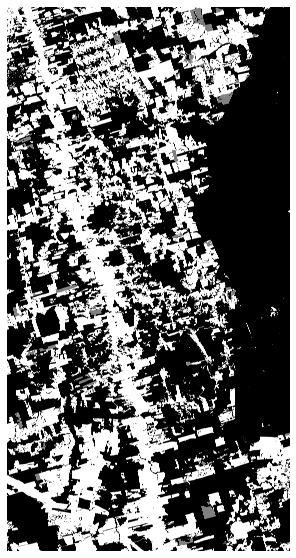

In [79]:
manager.logger.plotFigure(manager.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [80]:
manager.squeezeLabel()

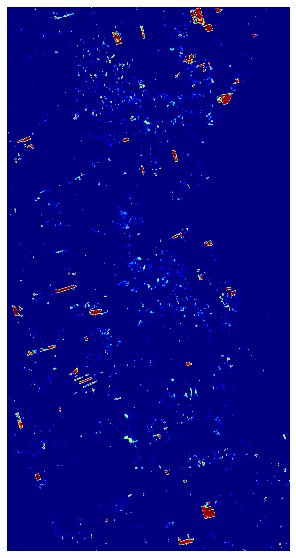

In [81]:
manager.setMeanProbNotConsideredAreas()
manager.logger.plotFigure(manager.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [82]:
print(manager.label_mask.shape)

(17730, 9200)


In [83]:
# manager.getLabelTest()

In [84]:
# manager.getMAP()

In [85]:
manager.prob_rec.shape

(17760, 9216, 2, 10)

In [86]:
manager.preprocessProbRec()
print(manager.prob_rec.shape)

(10, 17760, 9216, 2)


In [87]:
manager.prob_rec.shape

(10, 17760, 9216, 2)

In [88]:
manager.logger.getStats(manager.prob_rec)

ic| Logger.py:119 in getStats()
    np.min(value): 4.4016596e-18
    np.mean(value): 0.49999988
    np.max(value): 1.0


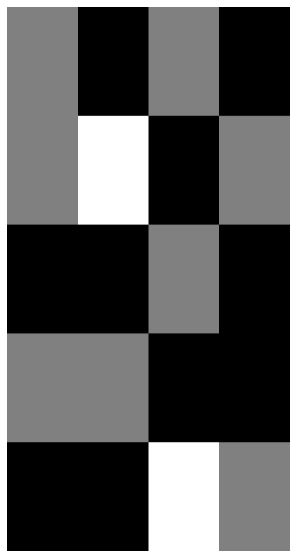

In [89]:
manager.logger.plotFigure(manager.mask_tr_val, 
            name=manager.dataset.site + manager.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [90]:
manager.getLabelCurrentDeforestation()

In [91]:
manager.applyProbabilityThreshold()

(17730, 9200)
(array([0., 1.], dtype=float32), array([160885099,   2230901], dtype=int64))


ic| base.py:413 in applyProbabilityThreshold()
    self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)


In [92]:
manager.getTestValues()

ic| base.py:436 in getTestValues()- predicted_test.shape: (81558000,)
ic| base.py:445 in getTestValues()- predicted_test.shape: (54236371,)


In [93]:
manager.removeSmallPolygons()

ic| metrics.py:213 in removeSmallPolygonsForMetrics()
    np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([160885099,   2230901], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161132034,   1983966], dtype=int64))
ic| metrics.py:215 in removeSmallPolygonsForMetrics()
    np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162869065,    246935], dtype=int64))


In [94]:
manager.calculateMetrics()

ic| base.py:489 in calculateMetrics()
    self.f1: 83.97
    self.precision: 80.66
    self.recall: 87.57


In [95]:
manager.getValidationValuesForMetrics()
manager.calculateMetricsValidation()

ic| base.py:418 in getValidationValuesForMetrics()
    self.label_mask_val.shape: (16311600,)
ic| base.py:424 in getValidationValuesForMetrics()
    self.label_mask_val_valid.shape: (9423983,)
ic| base.py:500 in calculateMetricsValidation()
    f1_val: 85.0
    precision_val: 77.99
    recall_val: 93.39
    mAP_val: 89.57


In [96]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    manager.calculateMAPWithoutSmallPolygons()

In [97]:
manager.get_label_no_buffer()

D:/Jorge/datasets/deforestation/PA/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:501 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| dataset.py:504 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:508 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/PA/deforestation_before_2008_PA.tif


ic| dataset.py:512 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| dataset.py:514 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| dataset.py:493 in loadLabel()
    label_per_date.shape: (17730, 9203, 1)


In [98]:
manager.getErrorMask()

(array([0., 1.], dtype=float32), array([162495064,    620936], dtype=int64))


In [99]:
manager.getErrorMaskToShowRGB()

[0. 1.]


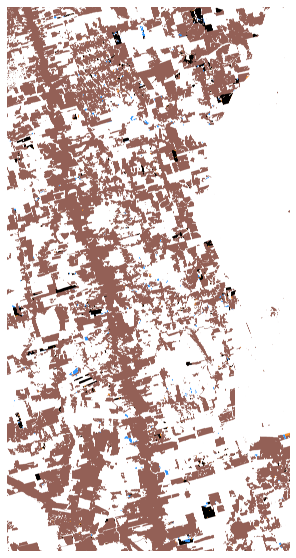

In [100]:
manager.logger.plotFigure(manager.error_mask_to_show_rgb[...,::-1], 
            name=manager.dataset.site + manager.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [101]:
'''
import types

manager.setUncertainty = types.MethodType(setUncertainty, manager)
'''


'\nimport types\n\nmanager.setUncertainty = types.MethodType(setUncertainty, manager)\n'

In [102]:
manager.setUncertainty()

K = 2, pred_mean shape (17760, 9216, 2)


In [103]:
# manager.uncertainty_map[manager.uncertainty_map>1] = 1

In [104]:
manager.logger.getStats(manager.uncertainty_map)

ic| Logger.py:119 in getStats()
    np.min(value): 2.1782762e-08
    np.mean(value): 0.018443981
    np.max(value): 0.3465736


In [105]:
manager.getUncertaintyToShow()
manager.logger.getStats(manager.uncertainty_to_show)


ic| Logger.py:119 in getStats()
    np.min(value): 0.0
    np.mean(value): 0.007883056
    np.max(value): 0.3465736


ic| 3944692317.py:4 in <cell line: 4>()
    manager.uncertainty_to_show.shape: (17730, 9200)


(17730, 9200)

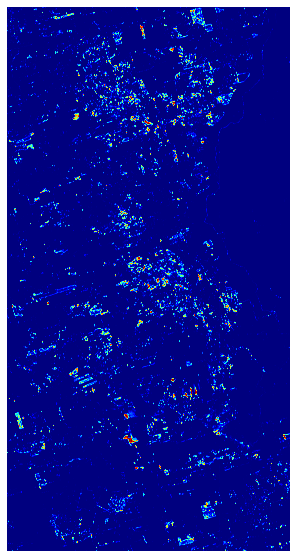

In [106]:

manager.logger.plotFigure(manager.uncertainty_to_show, 
            name=manager.dataset.site + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(manager.uncertainty_to_show.shape)



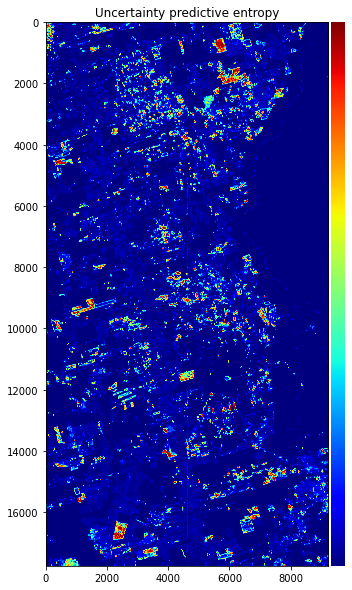

In [107]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(manager.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [108]:
manager.getValidationValues2()
manager.getTestValues2()

ic| base.py:540 in getTestValues2()
    self.label_mask.shape: (17730, 9200)
ic| base.py:541 in getTestValues2()
    self.mask_amazon_ts.shape: (17730, 9200)
ic| base.py:545 in getTestValues2()
    self.label_mask_test.shape: (81558000,)
ic| base.py:553 in getTestValues2()
    self.error_mask_test.shape: (54114419,)


In [109]:
manager.dataset.previewLims1 = np.array([11500, 12500, 9000, 10000])

ic| Logger.py:163 in plotCropSample()
    manager.dataset.previewLims1: array([11500, 12500,  9000, 10000])
    manager.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| Logger.py:165 in plotCropSample()
    np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| Logger.py:167 in plotCropSample()
    np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


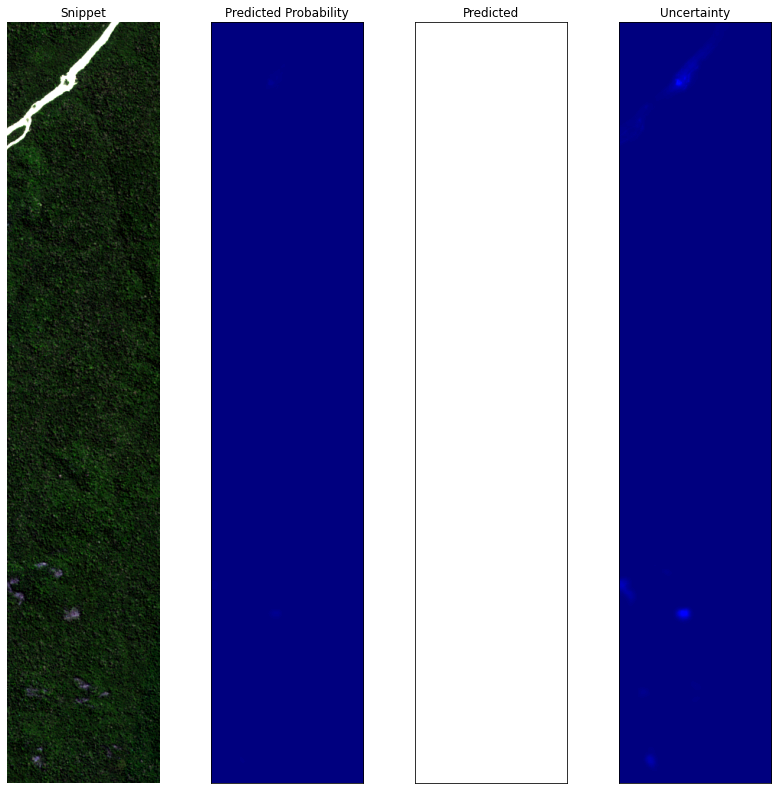

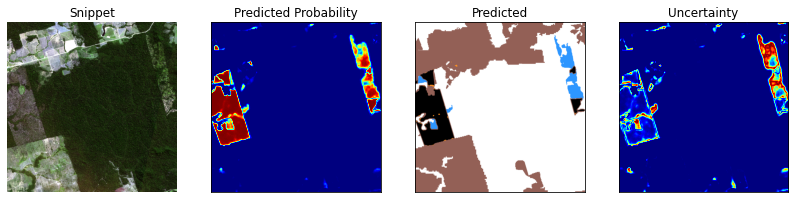

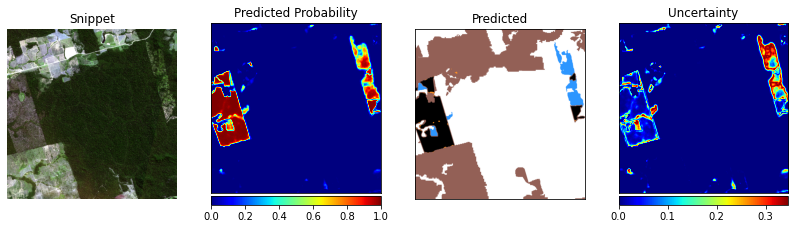

In [110]:
manager.logger.plotCropSample(manager)

In [111]:
if config["plotLandsat"] == True:
    label_tmp_dates = []
    for date in dataset.prodes_dates:
        label_tmp_date = dataset.loadLabelFromDate(date)
        label_tmp_date = label_tmp_date[:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1]]
        label_tmp_dates.append(label_tmp_date)

In [112]:
if config["plotLandsat"] == True:
    # del manager.image_stack
    import src.lansdatLoader as ll
    import importlib
    importlib.reload(ll)
    landsatLoader = ll.LandsatLoader(dataset)
    ims = landsatLoader.load()
    for idx in range(len(ims)):
        ims[idx] = ims[idx][:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1],:]
    ims = landsatLoader.darken_past_deforestation(ims, manager.label_no_buffer)
    ims = landsatLoader.add_deforestation_edges_by_date(ims, label_tmp_dates[:])

In [113]:
if config["plotLandsat"] == True:
    logger.plotCropSampleLandsat(manager, ims)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


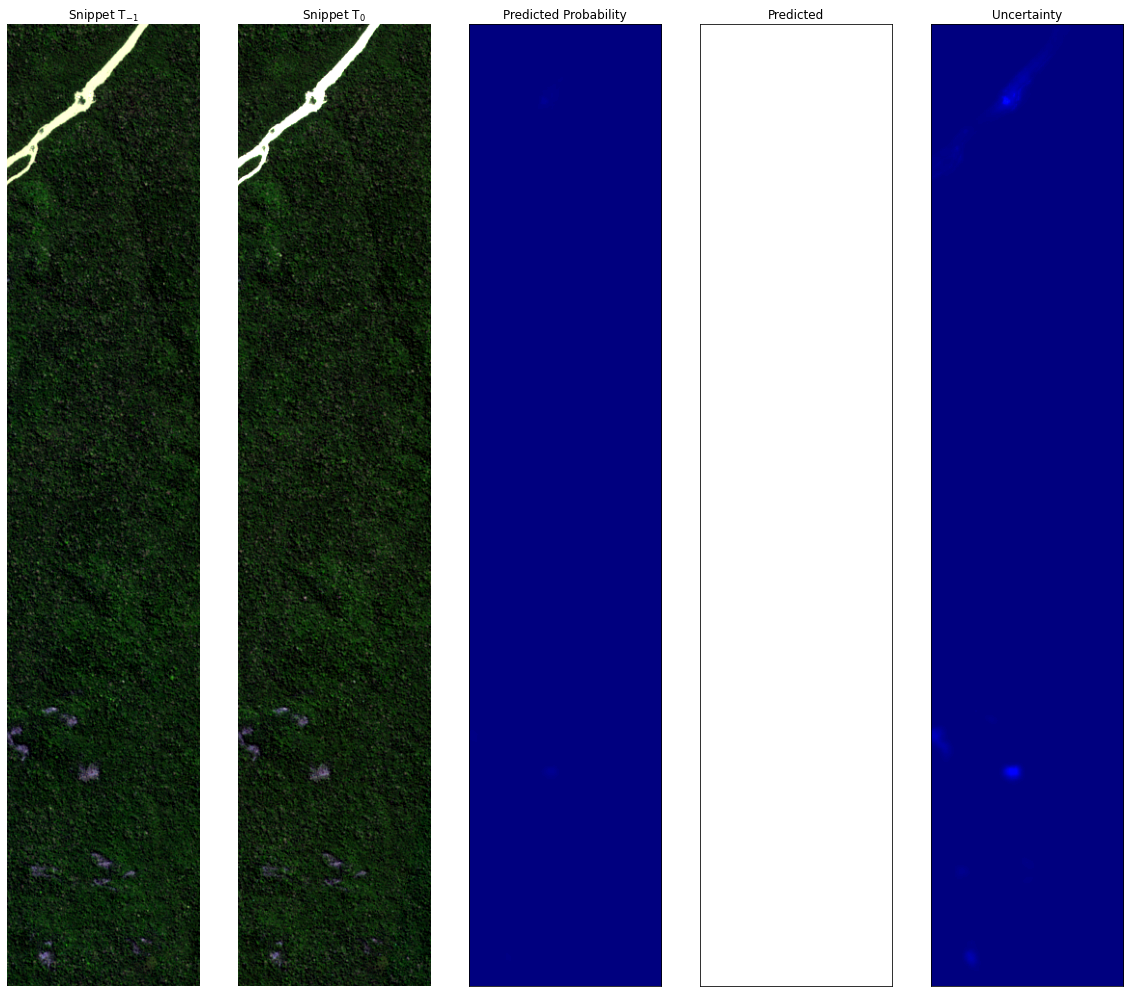

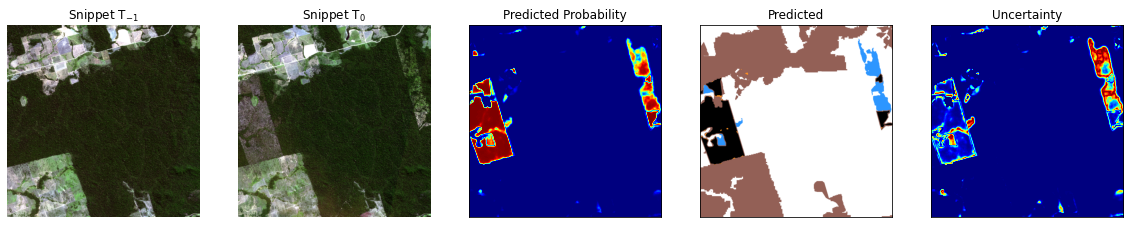

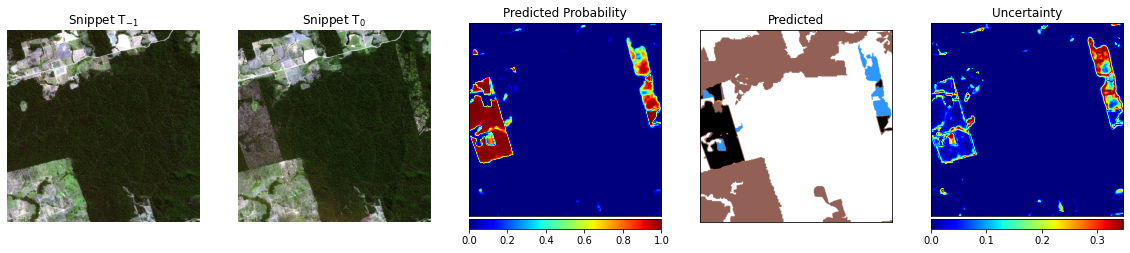

In [114]:
manager.logger.plotCropSampleT0T1(manager)

In [115]:
manager.logger.getStats(manager.uncertainty)


ic| Logger.py:119 in getStats()
    np.min(value): 2.1782762e-08
    np.mean(value): 0.010866339
    np.max(value): 0.3465736


In [116]:
'''
manager.getOtherUncertaintyMetrics()
print(manager.sUEO)

print(manager.ece_score)  
'''

'\nmanager.getOtherUncertaintyMetrics()\nprint(manager.sUEO)\n\nprint(manager.ece_score)  \n'

In [117]:
if config["plotPOI"] == True and config['site'] == 'PA':

    print(manager.mean_prob.shape)
    font = {'family': "Times New Roman",
            'color':  'white',
            'weight': 'bold',
            'size': 24,
            }

    lims = dataset.previewLims1
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['A', 'B', 'C', 'D', 'E', 'F']

    for poi_id in range(4):
            
            plt.text(manager.dataset.snippet_coords['snippet_id0'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id0'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')

    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi0.png'), 
    dpi=150, bbox_inches='tight')

    lims = dataset.previewLims2
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['E', 'F']

    print(manager.dataset.snippet_coords['snippet_id1'])
    for poi_id in range(2):
            
            plt.text(manager.dataset.snippet_coords['snippet_id1'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id1'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')
            
    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi1.png'), 
    dpi=150, bbox_inches='tight')

In [118]:
if config["plotPOI"] == True and config['site'] == 'PA':
    manager.getPOIValues()


In [119]:

if config["plotPOI"] == True and config['site'] == 'PA':
    import pickle
    with open('output/log/log_ensemble_.pkl', 'wb') as f:
                pickle.dump(manager.snippet_poi_results, f)


In [120]:
from src import metrics as _metrics

def getUncertaintyAAValues(self):



    # self.threshold_list = [0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36]

    # self.threshold_list = [0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36, np.max(uncertainty)-0.003]
    if self.config['uncertainty_method'] == "pred_entropy_single":
        self.threshold_list = [0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    if self.config['uncertainty_method'] == "pred_entropy":
            if self.classes_mode == False:
                    self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    # self.threshold_list = [0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 
                    #         0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
            else:
                    self.threshold_list = [0.0025, 0.025, 0.05, 0.075, 0.1, 0.2, 0.4, 
                    0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    
                    # self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    # 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]
    elif self.config['uncertainty_method'] == "pred_var":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.13/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.0015, np.max(self.uncertainty)-0.0008]
            self.threshold_list = np.linspace(np.min(self.uncertainty) + 0.000015, np.max(self.uncertainty) - 0.0015, 19)
    elif self.config['uncertainty_method'] == "MI":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.235/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    elif self.config['uncertainty_method'] == "KL":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.006, np.max(self.uncertainty)-0.003]
    elif self.config['uncertainty_method'] == "evidential":
            # self.threshold_list = [0.015, 0.03, 0.04]
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            # self.threshold_list = [ 0.15, 0.2,  
            #          0.3, 0.35, 0.4, 0.5, 0.6, 0.7]

            # self.threshold_list = [0.015,0.1, 0.2, 0.27, 0.36, 0.45, 0.55, 0.65]

            # self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(uncertainty)-0.006, np.max(uncertainty)-0.003]
                    
            # self.threshold_list = np.linspace(np.min(uncertainty) + 0.0015, np.max(uncertainty) - 0.0015, 19)
    print(self.threshold_list)
    self.loadThresholdMetrics = False
    if self.loadThresholdMetrics == False:
            # self.threshold_list = [0.1]
            # y_test
            ic(self.uncertainty.shape, self.label_mask_current_deforestation_test.shape)

            metrics_values = _metrics.getAA_Recall(self.uncertainty, 
                    self.label_mask_current_deforestation_test, 
                    self.predicted_test, self.threshold_list)

            # ic(metrics_values)


    self.m = {'precision_L': metrics_values[:,0],
            'recall_L': metrics_values[:,1],
            'recall_Ltotal': metrics_values[:,2],
            'AA': metrics_values[:,3],
            'precision_H': metrics_values[:,4],
            'recall_H': metrics_values[:,5],
            'UEO': metrics_values[:,6]}

    self.m['f1_L'] = 2*self.m['precision_L']*self.m['recall_L']/(self.m['precision_L']+self.m['recall_L'])
    self.m['f1_H'] = 2*self.m['precision_H']*self.m['recall_H']/(self.m['precision_H']+self.m['recall_H'])


In [121]:

import types

manager.getUncertaintyAAValues = types.MethodType(getUncertaintyAAValues, manager)



Get precision-recall threshold

In [122]:

manager.getUncertaintyAAValues()

ic| 1409948429.py:63 in getUncertaintyAAValues()
    self.uncertainty.shape: (54114419,)
    self.label_mask_current_deforestation_test.shape: (54114419,)


[0.0025, 0.025, 0.05, 0.075, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.3435735912322998, 0.3450735912322998]
threshold 0.0025


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (7485417,)
    predicted_test_classified_incorrect.shape: (7485417,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 7485417
    len(label_mask_current_deforestation_test): 54114419
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 7485417
    len(label_mask_current_deforestation_test): 54114419


[1.         0.43252488 0.00565524 0.13832574 0.80559017 0.88156709
 0.03219657]
threshold 0.025


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3971690,)
    predicted_test_classified_incorrect.shape: (3971690,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3971690
    len(label_mask_current_deforestation_test): 54114419
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3971690
    len(label_mask_current_deforestation_test): 54114419


[0.99798041 0.95315806 0.2966635  0.0733943  0.73444411 0.84069149
 0.05911661]
threshold 0.05


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2955025,)
    predicted_test_classified_incorrect.shape: (2955025,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2955025
    len(label_mask_current_deforestation_test): 54114419
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2955025
    len(label_mask_current_deforestation_test): 54114419


[0.99526397 0.95661697 0.42319962 0.05460698 0.68513757 0.81149519
 0.07776285]
threshold 0.075


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2393758,)
    predicted_test_classified_incorrect.shape: (2393758,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2393758
    len(label_mask_current_deforestation_test): 54114419
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2393758
    len(label_mask_current_deforestation_test): 54114419


[0.99050317 0.95418419 0.49753354 0.04423512 0.64825372 0.79018072
 0.09338169]
threshold 0.1


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2011826,)
    predicted_test_classified_incorrect.shape: (2011826,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2011826
    len(label_mask_current_deforestation_test): 54114419
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2011826
    len(label_mask_current_deforestation_test): 54114419


[0.98459022 0.95158538 0.55312915 0.03717726 0.61573444 0.7703476
 0.10765285]
threshold 0.2


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1096747,)
    predicted_test_classified_incorrect.shape: (1096747,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1096747
    len(label_mask_current_deforestation_test): 54114419
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1096747
    len(label_mask_current_deforestation_test): 54114419


[0.95409758 0.94102213 0.70572706 0.02026719 0.49126903 0.67976109
 0.1636847 ]
threshold 0.4


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (0,)
    predicted_test_classified_incorrect.shape: (0,)
ic| metrics.py:277 in getAA_Recall()
    np.all(label_current_deforestation_test_classified_incorrect) == 0: False
ic| metrics.py:278 in getAA_Recall()
    np.all(predicted_test_classified_incorrect) == 0: False


[      nan       nan       nan 0.              nan       nan 0.1636847]
threshold 0.5


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (0,)
    predicted_test_classified_incorrect.shape: (0,)
ic| metrics.py:277 in getAA_Recall()
    np.all(label_current_deforestation_test_classified_incorrect) == 0: False
ic| metrics.py:278 in getAA_Recall()
    np.all(predicted_test_classified_incorrect) == 0: False


[      nan       nan       nan 0.              nan       nan 0.1636847]
threshold 0.6


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (0,)
    predicted_test_classified_incorrect.shape: (0,)
ic| metrics.py:277 in getAA_Recall()
    np.all(label_current_deforestation_test_classified_incorrect) == 0: False
ic| metrics.py:278 in getAA_Recall()
    np.all(predicted_test_classified_incorrect) == 0: False


[      nan       nan       nan 0.              nan       nan 0.1636847]
threshold 0.7


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (0,)
    predicted_test_classified_incorrect.shape: (0,)
ic| metrics.py:277 in getAA_Recall()
    np.all(label_current_deforestation_test_classified_incorrect) == 0: False
ic| metrics.py:278 in getAA_Recall()
    np.all(predicted_test_classified_incorrect) == 0: False


[      nan       nan       nan 0.              nan       nan 0.1636847]
threshold 0.8


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (0,)
    predicted_test_classified_incorrect.shape: (0,)
ic| metrics.py:277 in getAA_Recall()
    np.all(label_current_deforestation_test_classified_incorrect) == 0: False
ic| metrics.py:278 in getAA_Recall()
    np.all(predicted_test_classified_incorrect) == 0: False


[      nan       nan       nan 0.              nan       nan 0.1636847]
threshold 0.9


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (0,)
    predicted_test_classified_incorrect.shape: (0,)
ic| metrics.py:277 in getAA_Recall()
    np.all(label_current_deforestation_test_classified_incorrect) == 0: False
ic| metrics.py:278 in getAA_Recall()
    np.all(predicted_test_classified_incorrect) == 0: False


[      nan       nan       nan 0.              nan       nan 0.1636847]
threshold 0.3435735912322998


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (106141,)
    predicted_test_classified_incorrect.shape: (106141,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 106141
    len(label_mask_current_deforestation_test): 54114419
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 106141
    len(label_mask_current_deforestation_test): 54114419


[0.8303323  0.88711387 0.86452907 0.00196142 0.25108172 0.43862451
 0.11056653]
threshold 0.3450735912322998


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (73491,)
    predicted_test_classified_incorrect.shape: (73491,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 73491
    len(label_mask_current_deforestation_test): 54114419
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 73491
    len(label_mask_current_deforestation_test): 54114419


[0.82295536 0.88385941 0.86797534 0.00135807 0.2494199  0.42960561
 0.08363148]


In [123]:
manager.getUncertaintyAAAuditedValues()

ic| base.py:682 in getUncertaintyAAAuditedValues()
    self.uncertainty.shape: (54114419,)
    self.label_mask_current_deforestation_test.shape: (54114419,)


threshold 0.0025
(54114419,) (54114419,)
cm_audited [[53376519        0]
 [    5475   732425]]
[1.        0.9925803]
threshold 0.025
(54114419,) (54114419,)
cm_audited [[53376076      443]
 [   10758   727142]]
[0.99939114 0.98542079]
threshold 0.05
(54114419,) (54114419,)
cm_audited [[53375033     1486]
 [   14162   723738]]
[0.99795098 0.9808077 ]
threshold 0.075
(54114419,) (54114419,)
cm_audited [[53372999     3520]
 [   17628   720272]]
[0.99513672 0.97611058]
threshold 0.1
(54114419,) (54114419,)
cm_audited [[53370131     6388]
 [   20766   717134]]
[0.99117097 0.97185798]
threshold 0.2
(54114419,) (54114419,)
cm_audited [[53351465    25054]
 [   32638   705262]]
[0.9656943  0.95576907]
threshold 0.4
(54114419,) (54114419,)
cm_audited [[53221587   154932]
 [   91724   646176]]
[0.80660286 0.87569589]
threshold 0.5
(54114419,) (54114419,)
cm_audited [[53221587   154932]
 [   91724   646176]]
[0.80660286 0.87569589]
threshold 0.6
(54114419,) (54114419,)
cm_audited [[53221587   1549

ic| base.py:688 in getUncertaintyAAAuditedValues()
    metric_values_audited: array([[1.        , 0.9925803 ],
                                  [0.99939114, 0.98542079],
                                  [0.99795098, 0.9808077 ],
                                  [0.99513672, 0.97611058],
                                  [0.99117097, 0.97185798],
                                  [0.9656943 , 0.95576907],
                                  [0.80660286, 0.87569589],
                                  [0.80660286, 0.87569589],
                                  [0.80660286, 0.87569589],
                                  [0.80660286, 0.87569589],
                                  [0.80660286, 0.87569589],
                                  [0.80660286, 0.87569589],
                                  [0.83438194, 0.8899878 ],
                                  [0.82592151, 0.88594661]])


cm_audited [[53238731   137788]
 [   84160   653740]]
[0.82592151 0.88594661]


In [124]:
manager.setPlotLimsForUncertaintyAA()

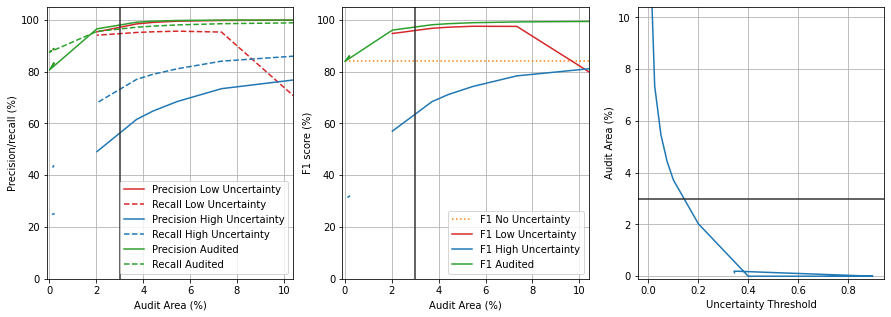

In [125]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
manager.plotUncertaintyAA(normalize_xlim=False)

In [126]:
from scipy import optimize  


In [127]:
manager.getOptimalUncertaintyThreshold(bounds=(np.min(manager.uncertainty) + 0.000015, np.max(manager.uncertainty) - 0.0015))

ic| base.py:791 in getOptimalUncertaintyThreshold()
    bounds: (1.5021782762260614e-05, 0.3450735912322998)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.13181566720306948
threshold 0.13181566720306948


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1648040,)
    predicted_test_classified_incorrect.shape: (1648040,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1648040
    len(label_mask_current_deforestation_test): 54114419
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1648040
    len(label_mask_current_deforestation_test): 54114419


[0.97686873 0.9495517  0.61083751 0.03045473 0.57533162 0.74250426
 0.12601239]
0.21327294581199252
threshold 0.21327294581199252


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1009969,)
    predicted_test_classified_incorrect.shape: (1009969,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1009969
    len(label_mask_current_deforestation_test): 54114419
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1009969
    len(label_mask_current_deforestation_test): 54114419


[0.94857311 0.93890772 0.72140534 0.01866358 0.47453141 0.66603681
 0.17062394]
0.08147230039168529
threshold 0.08147230039168529


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2283178,)
    predicted_test_classified_incorrect.shape: (2283178,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2283178
    len(label_mask_current_deforestation_test): 54114419
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2283178
    len(label_mask_current_deforestation_test): 54114419


[0.98894966 0.95338064 0.5129069  0.04219168 0.63981549 0.78523638
 0.09710683]
0.14853869858620347
threshold 0.14853869858620347


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1489613,)
    predicted_test_classified_incorrect.shape: (1489613,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1489613
    len(label_mask_current_deforestation_test): 54114419
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1489613
    len(label_mask_current_deforestation_test): 54114419


[0.97259314 0.94808161 0.6373655  0.0275271  0.55382736 0.72721258
 0.13584008]
0.11258621218922414
threshold 0.11258621218922414


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1855478,)
    predicted_test_classified_incorrect.shape: (1855478,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1855478
    len(label_mask_current_deforestation_test): 54114419
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1855478
    len(label_mask_current_deforestation_test): 54114419


[0.98150375 0.95092267 0.57739396 0.03428805 0.59974116 0.7594117
 0.11489709]
0.13339837687563905
threshold 0.13339837687563905


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1632138,)
    predicted_test_classified_incorrect.shape: (1632138,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1632138
    len(label_mask_current_deforestation_test): 54114419
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1632138
    len(label_mask_current_deforestation_test): 54114419


[0.97648234 0.94940869 0.61339341 0.03016087 0.57334767 0.74113372
 0.12694418]
0.13719503134582645
threshold 0.13719503134582645


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1595236,)
    predicted_test_classified_incorrect.shape: (1595236,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1595236
    len(label_mask_current_deforestation_test): 54114419
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1595236
    len(label_mask_current_deforestation_test): 54114419


[0.9755715  0.94910142 0.61957582 0.02947895 0.56843672 0.73767843
 0.12916242]
0.1348485698397114
threshold 0.1348485698397114


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1617977,)
    predicted_test_classified_incorrect.shape: (1617977,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1617977
    len(label_mask_current_deforestation_test): 54114419
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1617977
    len(label_mask_current_deforestation_test): 54114419


[0.97612689 0.94929557 0.61573248 0.02989918 0.57151412 0.73983639
 0.12778607]
0.13455880455252683
threshold 0.13455880455252683


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1620827,)
    predicted_test_classified_incorrect.shape: (1620827,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1620827
    len(label_mask_current_deforestation_test): 54114419
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1620827
    len(label_mask_current_deforestation_test): 54114419


[0.97621408 0.94930653 0.61526359 0.02995185 0.57187027 0.74011469
 0.12761656]
0.13423114088382057
threshold 0.13423114088382057


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1624031,)
    predicted_test_classified_incorrect.shape: (1624031,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1624031
    len(label_mask_current_deforestation_test): 54114419
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1624031
    len(label_mask_current_deforestation_test): 54114419


[0.97629988 0.94935207 0.61475403 0.03001106 0.57226372 0.74036805
 0.12743334]
0.13391305333730283
threshold 0.13391305333730283


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1627127,)
    predicted_test_classified_incorrect.shape: (1627127,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1627127
    len(label_mask_current_deforestation_test): 54114419
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1627127
    len(label_mask_current_deforestation_test): 54114419


[0.97635972 0.94938034 0.614277   0.03006827 0.57264782 0.74062513
 0.12724347]
0.13427025882411442
threshold 0.13427025882411442


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1623658,)
    predicted_test_classified_incorrect.shape: (1623658,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1623658
    len(label_mask_current_deforestation_test): 54114419
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1623658
    len(label_mask_current_deforestation_test): 54114419


[0.97628501 0.94935212 0.61480553 0.03000417 0.57222901 0.7403358
 0.12745519]
0.1343385416927225
threshold 0.1343385416927225


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1623016,)
    predicted_test_classified_incorrect.shape: (1623016,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1623016
    len(label_mask_current_deforestation_test): 54114419
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1623016
    len(label_mask_current_deforestation_test): 54114419


[0.97626993 0.94933822 0.61490717 0.0299923  0.57214893 0.74029221
 0.12749094]
0.13430359414899753
threshold 0.13430359414899753


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1623347,)
    predicted_test_classified_incorrect.shape: (1623347,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1623347
    len(label_mask_current_deforestation_test): 54114419
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1623347
    len(label_mask_current_deforestation_test): 54114419
ic| base.py:795 in getOptimalUncertaintyThreshold()
    self.threshold_optimal: 0.13430359414899753


[0.9762766  0.94934256 0.61486109 0.02999842 0.57218538 0.74031479
 0.12747094]


In [128]:
manager.getUncertaintyMetricsFromOptimalThreshold()

threshold:  0.13430359414899753
threshold 0.13430359414899753


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1623347,)
    predicted_test_classified_incorrect.shape: (1623347,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1623347
    len(label_mask_current_deforestation_test): 54114419
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1623347
    len(label_mask_current_deforestation_test): 54114419


[0.9762766  0.94934256 0.61486109 0.02999842 0.57218538 0.74031479
 0.12747094]
threshold 0.13430359414899753
(54114419,) (54114419,)


ic| base.py:826 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_optimal: {'AA': array([0.02999842]),
                     'UEO': array([0.12747094]),
                     'f1': 83.97,
                     'f1_H': array([0.64548151]),
                     'f1_L': array([0.96262121]),
                     'precision_H': array([0.57218538]),
                     'precision_L': array([0.9762766]),
                     'recall_H': array([0.74031479]),
                     'recall_L': array([0.94934256]),
                     'recall_Ltotal': array([0.61486109])}
ic| base.py:827 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_audited_optimal: {'f1': array([0.97590959]),
                             'precision': array([0.98478712]),
                             'recall': array([0.96719068])}


cm_audited [[53365494    11025]
 [   24210   713690]]
[0.98478712 0.96719068]


{'metrics': {'precision_L': array([0.9762766]),
  'recall_L': array([0.94934256]),
  'recall_Ltotal': array([0.61486109]),
  'AA': array([0.02999842]),
  'precision_H': array([0.57218538]),
  'recall_H': array([0.74031479]),
  'UEO': array([0.12747094]),
  'f1_L': array([0.96262121]),
  'f1_H': array([0.64548151]),
  'f1': 83.97},
 'metrics_audited': {'precision': array([0.98478712]),
  'recall': array([0.96719068]),
  'f1': array([0.97590959])},
 'exp': 20}